## 决策边界

$\textbf{决策边界}$:
$$\Large \theta^T\cdot x_b=0$$  
若X有两个特征：
$$\Large \theta_0+\theta_1x_1+\theta_2x_2$$  
$$\Large x_2 = \frac{-\theta_0-\theta_1x_1}{\theta_2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

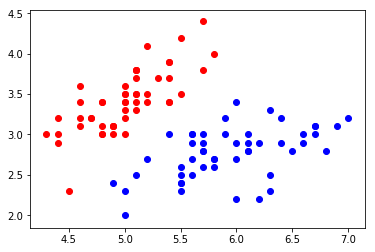

In [2]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.show()

In [3]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [4]:
from playML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [11]:
log_reg.score(X_test, y_test)

1.0

说明测试数据集的正确率为100%

In [5]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [6]:
log_reg.intercept_

-0.6937719272911228

$$\Large x_2 = \frac{-\theta_0-\theta_1x_1}{\theta_2}$$

In [7]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

In [8]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

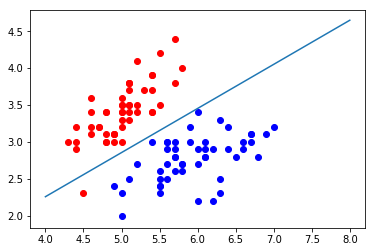

In [9]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

分类结果：上方为0，下方为1  
这里有一个红点在下方，与上方的100%正确率矛盾，说明这个点在训练数据集上，不在测试数据集上

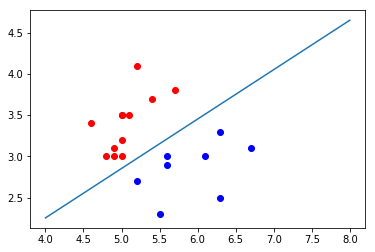

In [10]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color="red")
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

选取的数据都在$\textbf{测试数据集}$上，红、蓝两种样本被$\textbf{决策界限}$分隔，验证了正确率为100%

在一些算法（如：kNN、逻辑回归）中，可以通过加入$\textbf{多项式项}，使决策边界不再是简单的直线$

D:\MachineLearning\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


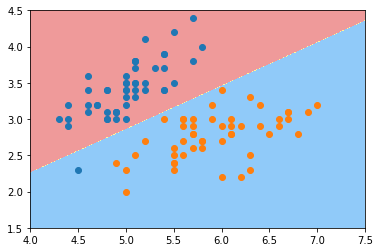

In [12]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

[contourf文档](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html)

## kNN的决策边界

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
knn_clf.score(X_test, y_test)

1.0

D:\MachineLearning\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


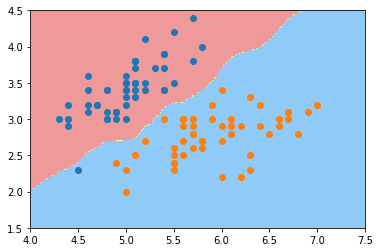

In [15]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 三分类版本

In [16]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

D:\MachineLearning\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


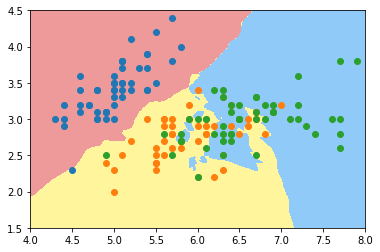

In [17]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

图像不规则，明显过拟合  
n_neighbors默认值为5，值越小模型越复杂，越容易出现过拟合

D:\MachineLearning\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


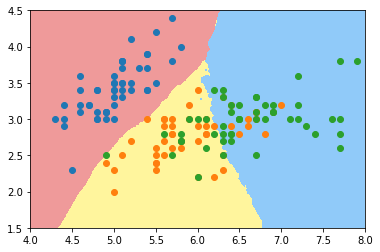

In [18]:
# 将 k 设置为 50
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

图像更为规整，也验证了：k的值越大，分块越明显，越不容易出现过拟合